In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:/Users/DELL/Downloads/data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filtering data for jobs in US

In [3]:
df_US = df[(df['job_country']=='United States') &(df['job_title_short']=='Data Analyst')].copy()

In [4]:
job_loc = df_US['job_location'].value_counts().head(10).to_frame()

# Finding out the counts of jobs based on the location

In [5]:
import seaborn as sns

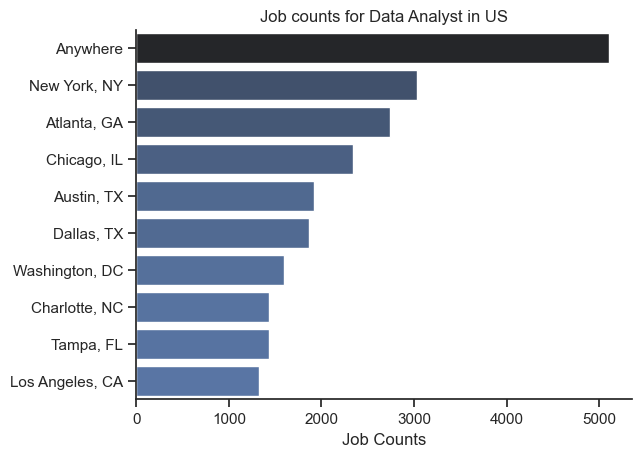

In [6]:
sns.set_theme(style='ticks')
sns.barplot(data=job_loc, x='count', y=job_loc.index, hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Job counts for Data Analyst in US')
plt.xlabel('Job Counts')
plt.ylabel('')
plt.show()

# Finding out:

 - If the jobs allow work ftom home?,
 - Is a degree requirement mentioned?,
 - Does the job offer Health Insurance?

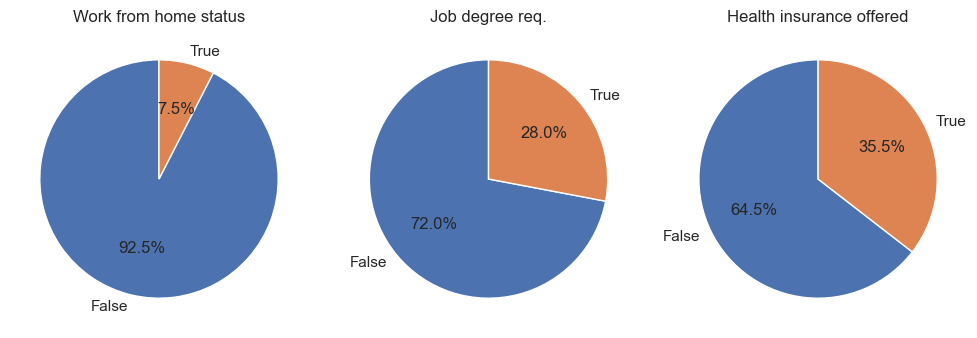

In [7]:
job_titles = {
    'job_work_from_home':'Work from home status',
    'job_no_degree_mention':'Job degree req.',
    'job_health_insurance':'Health insurance offered'
}

fig, ax = plt.subplots(1, 3, figsize=(10,5))
for i, (col, tit) in enumerate(job_titles.items()):
    # print(i, col, tit)
    ax[i].pie(df_US[col].value_counts(), startangle=90, autopct='%0.1f%%', labels=['False', 'True'])
    ax[i].set_title(tit)
plt.tight_layout()
plt.show()

# Finding the counts of jobs provided by the top 15 companies 

In [8]:
df_plot = df['company_name'].copy().value_counts().head(15).to_frame()

In [9]:
df_plot

,count
company_name,
Emprego,6664
Booz Allen Hamilton,2879
Dice,2827
Harnham,2547
Insight Global,2254
Citi,2164
Confidenziale,2040
Listopro,1984
Capital One,1946


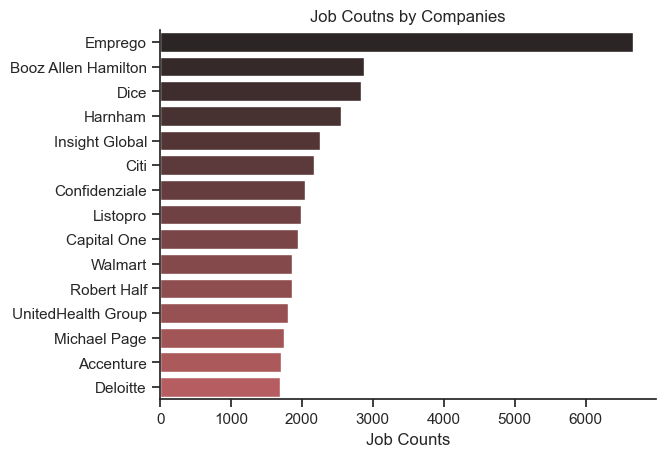

In [10]:
sns.barplot(data=df_plot, x='count', y='company_name', hue='company_name', palette='dark:r')
sns.despine()
plt.xlabel('Job Counts')
plt.ylabel('')
plt.title('Job Coutns by Companies')
plt.show()

# Finding the distribution of yearly salary for Data Analyst jobs in US

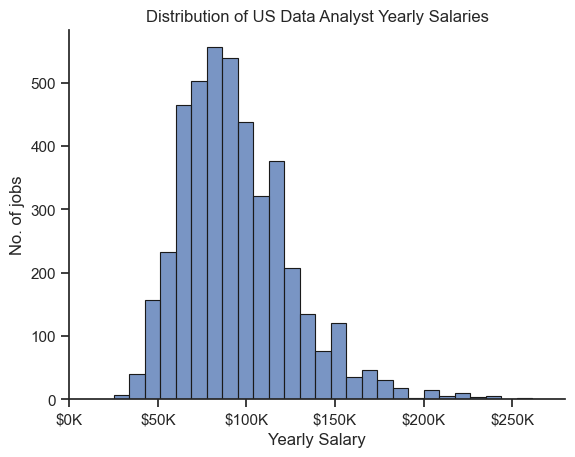

In [11]:
df_us_da = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

sns.histplot(data=df_us_da, x='salary_year_avg', bins=40, edgecolor='k')
sns.despine()
plt.xlim(0, 280000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.xlabel("Yearly Salary")
plt.ylabel('No. of jobs')
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.show()

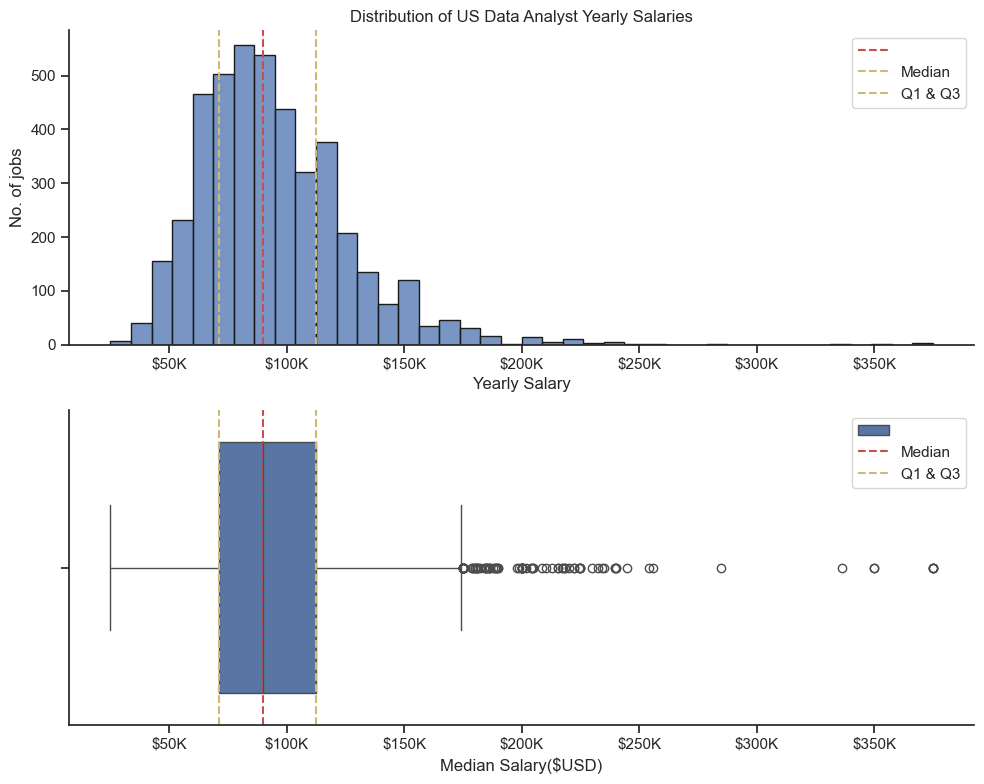

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))


sns.histplot(data=df_us_da, x='salary_year_avg', bins=40, edgecolor='k', ax=axs[0])
sns.despine()
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
axs[0].axvline(df_us_da['salary_year_avg'].median(), color='r', linestyle='--')
axs[0].axvline(df_us_da['salary_year_avg'].quantile(0.25) ,color='y', linestyle='--')
axs[0].axvline(df_us_da['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
axs[0].legend(['','Median', 'Q1 & Q3'])
axs[0].set_xlabel("Yearly Salary")
axs[0].set_ylabel('No. of jobs')
axs[0].set_title('Distribution of US Data Analyst Yearly Salaries')

sns.boxplot(data=df_us_da, x='salary_year_avg', vert=False, ax=axs[1])
sns.despine()
axs[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
axs[1].axvline(df_us_da['salary_year_avg'].median(), color='r', linestyle='--')
axs[1].axvline(df_us_da['salary_year_avg'].quantile(0.25), color='y', linestyle='--') 
axs[1].axvline(df_us_da['salary_year_avg'].quantile(0.75), color='y', linestyle='--') 
axs[1].legend(['', 'Median', 'Q1 & Q3'])
axs[1].set_xlabel('Median Salary($USD)') 
axs[1].set_ylabel('') 
plt.tight_layout()

plt.show()

# Salary distribution in US for Data Analyst, Data Scientist, Data Engineer

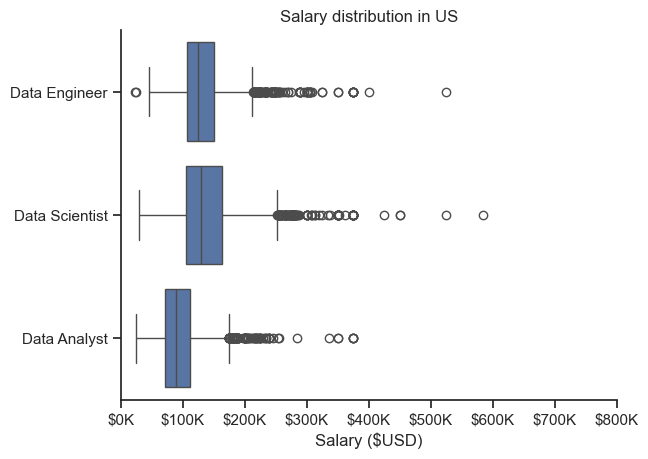

In [13]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_lists = [df_US[df_US['job_title_short']==jobtitle]['salary_year_avg'] for jobtitle in job_titles]

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', vert=False)
sns.despine()
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.xlabel('Salary ($USD)')
plt.ylabel('')
plt.title('Salary distribution in US')
plt.xlim(0, 800000)

plt.show()

# Demand of jobs by month

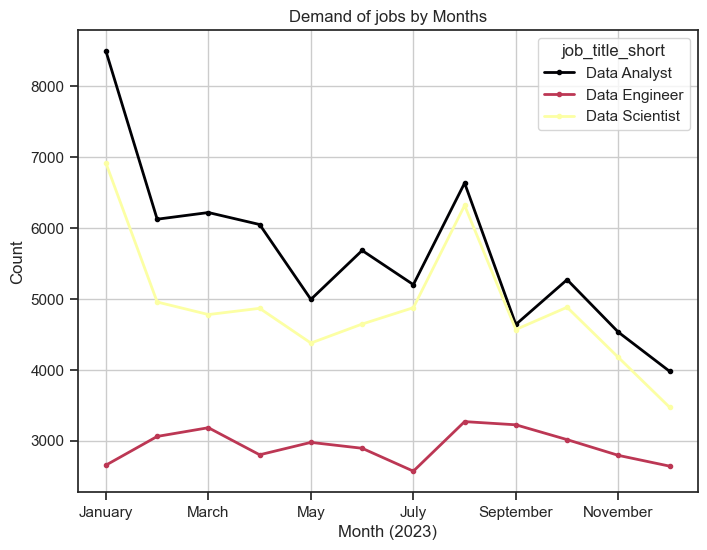

In [14]:
df_uss = df[df['job_country']=='United States'].copy()

df_uss['job_month'] = df_uss['job_posted_date'].dt.strftime('%B')

df_US_pivot = df_uss.pivot_table(index='job_month', columns='job_title_short', aggfunc='size')

df_US_pivot.reset_index(inplace=True)

df_US_pivot['job_mon_'] = pd.to_datetime(df_US_pivot['job_month'], format='%B').dt.month 

df_US_pivot.sort_values('job_mon_', inplace=True)
df_US_pivot.set_index('job_month', inplace=True)
df_US_pivot.drop(columns='job_mon_', inplace=True)
job_titles = df['job_title_short'].value_counts().head(3)
job_titles = job_titles.index.tolist()
df_US_pivot = df_US_pivot[job_titles]


df_US_pivot.plot(kind='line', 
                  linewidth=2,
                  linestyle='-',
                  colormap='inferno',
                  marker='o',
                  markersize=3,
                  figsize=(8,6)
                  )
plt.grid()
plt.xlabel('Month (2023)')
plt.ylabel('Count')
plt.title('Demand of jobs by Months')
plt.show()
